In [10]:
import numpy as np #Array Processing Package
import pandas as pd #
from subprocess import check_output
from matplotlib import pyplot as plt

In [11]:
from sklearn import datasets,svm,metrics
from sklearn.svm import SVC

In [21]:
digits = datasets.load_digits()
print('Digit Dataset Keys\n',format(digits.keys()))
print('Digit Target Name:\n',format(digits.target_names))

print(f"Shape of the dataset \n DataSet : {format(digits.data.shape)} \n Target : {format(digits.target.shape)}")

print("Shape of the images:",format(digits.images.shape))

Digit Dataset Keys
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Digit Target Name:
 [0 1 2 3 4 5 6 7 8 9]
Shape of the dataset 
 DataSet : (1797, 64) 
 Target : (1797,)
Shape of the images: (1797, 8, 8)


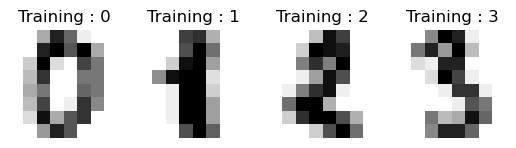

In [47]:
for i in range(0,4):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    plt.imshow(im1,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title(f"Training : {format(digits.target[i])}")
plt.show()


In [32]:
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples,-1))
data_images.shape

(1797, 64)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_images,digits.target)

print(f"Shape of the Training data \n X-Train : {format(x_train.shape)} \n Y-Train : {format(y_train.shape)}")
print(f"Shape of the Testing data \n X-Test : {format(x_test.shape)} \n Y-Test : {format(y_test.shape)}")


Shape of the Training data 
 X-Train : (1347, 64) 
 Y-Train : (1347,)
Shape of the Testing data 
 X-Test : (450, 64) 
 Y-Test : (450,)


In [46]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

print("Classification report \n",metrics.classification_report(y_test,y_pred))
print("Confusion Matrics \n",metrics.confusion_matrix(y_test,y_pred))


Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        44
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        39
           7       1.00      1.00      1.00        37
           8       0.98      0.98      0.98        50
           9       1.00      0.98      0.99        50

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Confusion Matrics 
 [[49  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]